# Klasyfikacja tekstów

In [2]:
# Reprezentacja dokumentów w postaci wektorów słów
# Zob. moduł 3.3

from sklearn.feature_extraction.text import CountVectorizer

texts = ['Ambasador odwołana z Brazylii.', 
         'Brazylia: Znaczny spadek przyrostu zakażeń.',
         'Brazylia: minister zdrowia Brazylii zakażony koronawirusem.',
         'Nie ma mocnych na Brazylię.',
        'Brazylia: 27 750 nowych przypadków koronawirusa.']

count_v = CountVectorizer()
counts = count_v.fit_transform(texts).toarray()

#print(count_v.vocabulary_) Lepiej posortować po indeksach:
print({k: v for k, v in sorted(count_v.vocabulary_.items(), key=lambda item: item[1])})

print("-"*50)
print(counts)

{'27': 0, '750': 1, 'ambasador': 2, 'brazylia': 3, 'brazylii': 4, 'brazylię': 5, 'koronawirusa': 6, 'koronawirusem': 7, 'ma': 8, 'minister': 9, 'mocnych': 10, 'na': 11, 'nie': 12, 'nowych': 13, 'odwołana': 14, 'przypadków': 15, 'przyrostu': 16, 'spadek': 17, 'zakażeń': 18, 'zakażony': 19, 'zdrowia': 20, 'znaczny': 21}
--------------------------------------------------
[[0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1]
 [0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]]


In [3]:
!pip install spacy-nightly --pre
!python -m spacy download pl_core_news_sm

2021-01-03 16:20:09.276112: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_sm')


In [4]:
# W tradycyjnych wektorowych reprezentacjach tekstów lematyzacja pozwala uchwycić zależności między słowoformami

import spacy

nlp_pl = spacy.load("pl_core_news_sm")

lemmatized_texts = []
for tx in texts:
    doc = nlp_pl(tx)
    lemmatized_texts.append(" ".join([w.lemma_.lower() for w in doc]))

for lti, lt in enumerate(lemmatized_texts):
    print("{}.\t{}".format(lti,lt))




0.	ambasador odwołana z brazylia .
1.	brazylia : znaczny spadek przyrost zakażenie .
2.	brazylia : minister zdrowie brazylia zakazić koronawirusem .
3.	nie mieć mocny na brazylia .
4.	brazylia : 27 750 nowy przypadek koronawirusa .


In [5]:
# Lematyzacja

count_v = CountVectorizer()
counts = count_v.fit_transform(lemmatized_texts).toarray()

#Sortujemy słownik po indeksach:
print({k: v for k, v in sorted(count_v.vocabulary_.items(), key=lambda item: item[1])})

print("--------")
print(counts)

{'27': 0, '750': 1, 'ambasador': 2, 'brazylia': 3, 'koronawirusa': 4, 'koronawirusem': 5, 'mieć': 6, 'minister': 7, 'mocny': 8, 'na': 9, 'nie': 10, 'nowy': 11, 'odwołana': 12, 'przypadek': 13, 'przyrost': 14, 'spadek': 15, 'zakazić': 16, 'zakażenie': 17, 'zdrowie': 18, 'znaczny': 19}
--------
[[0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1]
 [0 0 0 2 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]]


In [6]:
# TF -- TERM Frequency
# IDF -- Inverted document frequency
# Zob. moduł 3.8 

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='utf-8', ngram_range=(1, 1))
tfidf_weights = tfidf.fit_transform(lemmatized_texts)

# print(tfidf.vocabulary_) #Możemy posortować po indeksach:
print({k: v for k, v in sorted(tfidf.vocabulary_.items(), key=lambda item: item[1])})
print("\nIDF\n")
print(tfidf.idf_)
print("\nTF-IDF\n")
print(tfidf_weights.shape)
print(tfidf_weights.toarray())


{'27': 0, '750': 1, 'ambasador': 2, 'brazylia': 3, 'koronawirusa': 4, 'koronawirusem': 5, 'mieć': 6, 'minister': 7, 'mocny': 8, 'na': 9, 'nie': 10, 'nowy': 11, 'odwołana': 12, 'przypadek': 13, 'przyrost': 14, 'spadek': 15, 'zakazić': 16, 'zakażenie': 17, 'zdrowie': 18, 'znaczny': 19}

IDF

[2.09861229 2.09861229 2.09861229 1.         2.09861229 2.09861229
 2.09861229 2.09861229 2.09861229 2.09861229 2.09861229 2.09861229
 2.09861229 2.09861229 2.09861229 2.09861229 2.09861229 2.09861229
 2.09861229 2.09861229]

TF-IDF

(5, 20)
[[0.         0.         0.67009179 0.31930233 0.         0.
  0.         0.         0.         0.         0.         0.
  0.67009179 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.23176546 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.48638585 0.48638585 0.         0.48638585
  0.         0.48638585]
 [0.         0.         0.         0.37410477 0. 

In [1]:
# Pobieramy kolekcję tekstów


!pip install gdown

# Kolekcja ponad 100 tys. nagłówków z polskich portali informacyjnych z października-listopada 2020 r.
!rm news_pl.jsonl
!gdown https://drive.google.com/uc?id=1w8sx3Rs2W1fZgSnJmsKKph0oHueH0yww

You should consider upgrading via the '/Users/ppez/anaconda3/bin/python -m pip install --upgrade pip' command.
rm: news_pl.jsonl: No such file or directory
Downloading...
From: https://drive.google.com/uc?id=1w8sx3Rs2W1fZgSnJmsKKph0oHueH0yww
To: /Users/ppez/Google Drive/PRACA/SAG/course/6_2/code_data/news_pl.jsonl
42.7MB [00:02, 18.6MB/s]


In [2]:
# Wczytujemy korpus nagłówków prasowych wraz z metadanymi
import json 


def read_json_documents(jsonl):
    docs = []
    with open(jsonl,'r') as file:
        for line in file:
            if(len(line.strip())>0):
                docs.append(json.loads(line))
    return docs

headlines_pl = read_json_documents('news_pl.jsonl')

# Jedną z metadanych jest pole 'category', w którym określona jest kategoria informacji 
# m.in. 'news', 'sport', 'business'

print(len(headlines_pl))
print(headlines_pl[0])

116056
{'id': '81d72ff3d226249c001dd3515a413a60', 'language': 'pl', 'source': 'wirtualnemedia.pl', 'published': '2020-10-01T00:00:00Z', 'title': 'Aleksandra Budka po 8 latach rozstaje się z radiową Trójką', 'url': 'https://www.wirtualnemedia.pl/artykul/aleksandra-budka-po-8-latach-rozstaje-sie-z-radiowa-trojka', 'category': ['news']}


In [3]:
# Budujemy wektorowe reprezentacje TF-IDF dokumentów

from sklearn.feature_extraction.text import TfidfVectorizer

docs = [h['title'] for h in headlines_pl if  h['category'][0] in ['news','sport','business']]
categories = [h['category'][0] for h in headlines_pl if  h['category'][0] in ['news','sport','business']]

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l1', encoding='utf-8', ngram_range=(1,1))
weights = tfidf.fit_transform(docs)
labels = categories

#print({k: v for k, v in sorted(tfidf_vect.vocabulary_.items(), key=lambda item: item[1])})
#print(docs[0:10])
#print(labels[0:10])

from collections import Counter
labels_count = Counter(labels)
print(labels_count)

# 107 tys. dokumentów, 83 tys. (niezlematyzowanych) słowoform
#print(weights.toarray().shape)
#print(weights.toarray())

Counter({'news': 84212, 'business': 19763, 'sport': 3692})


In [4]:
# Wieloklasowy klasyfikator bayesowski
# https://scikit-learn.org/stable/modules/naive_bayes.html (Pedregosa et al. 2011)

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Podział na trening/ test: test_size = 0.25
# Podanie wartości random_state pozwala zachować ten podział
# X_train to dokumenty ze zb. treningowego, X_test -- dokumenty ze zbioru testowego, Y_* -- etykiety/ kategorie
X_train, X_test, y_train, y_test = train_test_split(docs,labels, random_state = 0,test_size = 0.25) 
count_vectorizer = CountVectorizer()
# Tworzymy wektory tf-idf tylko ze zbioru treningowego. Utworzony model będzie zawierał segmentator/ tokenizer.
X_train_cnt = count_vectorizer.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_cnt)
# Trening
model = MultinomialNB().fit(X_train_tfidf, y_train)

In [5]:
# Użycie klasyfikatora
print(model.predict(count_vectorizer.transform(["UOKiK: banki nie mogą jednostronnie zmieniać ważnych warunków umów o kredyt hipoteczny"])))
print(model.classes_)
print(model.predict_proba(count_vectorizer.transform(["UOKiK: banki nie mogą jednostronnie zmieniać ważnych warunków umów o kredyt hipoteczny"])))

['business']
['business' 'news' 'sport']
[[9.60294645e-01 3.96923534e-02 1.30012767e-05]]


## Walidacja klasyfikatorów

In [6]:
# Walidacja krzyżowa na accuracy, zob. https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

cv_folds = 5 # Liczba partycji. Wybieramy za każdym razem 20% innych danych do testowania.  
models = [
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(max_iter=300, random_state=0)
]

# Wyniki walidacji przechowujemy w obiekcie DataFrame
cv_df = pd.DataFrame(index=range(cv_folds * len(models)))
results = []
for mi, model in enumerate(models):
    model_name = model.__class__.__name__
    print("Evaluating model: {} ({} of {}).".format(model_name, mi+1, len(models)))
    accuracies = cross_val_score(model, weights, labels, scoring='accuracy', cv=cv_folds)
    for fold, accuracy in enumerate(accuracies):
        results.append((model_name, fold, accuracy))

Evaluating model: LinearSVC (1 of 3).
Evaluating model: MultinomialNB (2 of 3).
Evaluating model: LogisticRegression (3 of 3).


In [9]:
# Wyniki walidacji krzyżowej 

import pandas as pd

# Analiza wyników walidacji
cv_df = pd.DataFrame(results, columns=['model', 'fold_num', 'accuracy'])

print("\nWyniki walidacji krzyżowej\n")
print(cv_df)

# Średnie 
cv_df.groupby('model').accuracy.mean()


Wyniki walidacji krzyżowej

                 model  fold_num  accuracy
0            LinearSVC         0  0.828132
1            LinearSVC         1  0.830501
2            LinearSVC         2  0.832072
3            LinearSVC         3  0.829657
4            LinearSVC         4  0.828960
5        MultinomialNB         0  0.784434
6        MultinomialNB         1  0.784805
7        MultinomialNB         2  0.784424
8        MultinomialNB         3  0.784703
9        MultinomialNB         4  0.784610
10  LogisticRegression         0  0.805795
11  LogisticRegression         1  0.807049
12  LogisticRegression         2  0.805926
13  LogisticRegression         3  0.806204
14  LogisticRegression         4  0.807923


model
LinearSVC             0.829864
LogisticRegression    0.806580
MultinomialNB         0.784595
Name: accuracy, dtype: float64

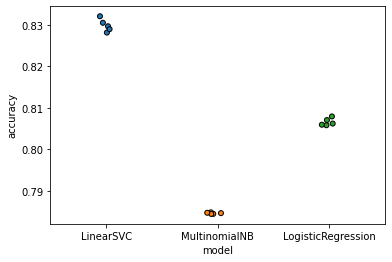

In [10]:
# Wariancja dla 3 klasyfikatorów na różnych podziałach danych na treningowe/ testowe

import seaborn as sns
import matplotlib.pyplot as plt

sns.stripplot(x='model', y='accuracy', data=cv_df, size=5, jitter=True, edgecolor="black", linewidth=1)
plt.show()

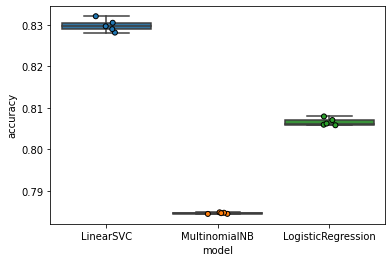

In [11]:
# Można dodatkowo ocenić wariancję na podstawie wykresu pudełkowego

sns.boxplot(x='model', y='accuracy', data=cv_df)
sns.stripplot(x='model', y='accuracy', data=cv_df, size=5, jitter=True, edgecolor="black", linewidth=1)
plt.show()

In [12]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
# W przypadku kategoryzacji wieloklasowej accuracy jest równa wskaźnikowi Jaccarda (część wspólna/ sumę) (Zob. moduł 3)

from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
print(accuracy_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred, normalize=False))


0.5
2


In [13]:
# Macierz pomyłek

from sklearn.metrics import confusion_matrix
from collections import *

class OrderedCounter(Counter, OrderedDict):
    pass

model = MultinomialNB()


X_train, X_test, y_train, y_test = train_test_split(weights, labels, test_size=0.20, random_state=0) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

labels_txt = [l for l in OrderedCounter(labels)]
print(labels_txt)

conf_mat = confusion_matrix(y_test, y_pred, labels = labels_txt)

print(conf_mat)

['news', 'business', 'sport']
[[16823     1     0]
 [ 3918    56     0]
 [  736     0     0]]


In [14]:
# Precyzja liczona po instancjach: P = TP / (TP+FP)
from sklearn import metrics

dobre_predykcje = (conf_mat[0][0]+conf_mat[1][1]+conf_mat[2][2])
print("Dobre predykcje: {}".format(dobre_predykcje))
zle_predykcje = (conf_mat[0][1]+conf_mat[0][2]+conf_mat[1][0]+conf_mat[1][2]+conf_mat[2][0]+conf_mat[2][1])

print("Złe predykcje: {}".format(zle_predykcje))
print("Micro average precision: {} ".format(dobre_predykcje/(dobre_predykcje+zle_predykcje)))

print(metrics.precision_score(y_test, y_pred, average='micro')) # Liczona per instancja
print(metrics.recall_score(y_test, y_pred, average='micro')) # Liczony per instancja
print(accuracy_score(y_test,y_pred))

dobre_predykcje_news = conf_mat[0][0]

print("Precyzja z kategorii news: {} ".format((dobre_predykcje_news/(dobre_predykcje+zle_predykcje))))

Dobre predykcje: 16879
Złe predykcje: 4655
Micro average precision: 0.7838302219745519 
0.7838302219745519
0.7838302219745519
0.7838302219745519
Precyzja z kategorii news: 0.781229683291539 


In [15]:
# P = TP / (TP+FP)

# Uwaga na /0
P_news = conf_mat[0][0]/ (conf_mat[0][0]+(conf_mat[1][0]+conf_mat[2][0]))
P_business = conf_mat[1][1]/(conf_mat[1][1]+(conf_mat[0][1]+conf_mat[2][1])) 
P_sport = conf_mat[2][2]/(conf_mat[2][2]+(conf_mat[0][2]+conf_mat[1][2])+0.001)#/0

class_precision = [P_news,P_business, P_sport]
macro_avg_precision = sum(class_precision)/len(class_precision)

print(class_precision)
print("Macro average precision: {}".format(macro_avg_precision))
print(metrics.precision_score(y_test, y_pred, average='macro',zero_division='warn')) # Liczona jako średnia z klas
print("Macro average recall: {}".format(metrics.recall_score(y_test, y_pred, average='macro')))

[0.7833030683987522, 0.9824561403508771, 0.0]
Macro average precision: 0.5885864029165431
0.5885864029165431
Macro average recall: 0.33801071882436345


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn import metrics

# F1 -- średnia harmoniczna z precyzji/ pokrycia
# Pokrycie dla klas news i business mocno zaniża średnią ważoną

print(metrics.f1_score(y_test, y_pred, average='micro')) # Liczona per instancja
print(metrics.f1_score(y_test, y_pred, average='macro')) # Liczona per klasa


0.7838302219745519
0.3020824573801146


In [17]:
# ComplementNB -- lepszy recall mniej licznych klas
from sklearn.naive_bayes import ComplementNB
model = ComplementNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

labels_txt = [l for l in OrderedCounter(labels)]
print(labels_txt)

conf_mat = confusion_matrix(y_test, y_pred, labels = labels_txt)

print(conf_mat)

['news', 'business', 'sport']
[[13815  2018   991]
 [ 1367  2489   118]
 [  259    26   451]]


In [18]:
# To samo dla SVM

model = LinearSVC()

X_train, X_test, y_train, y_test = train_test_split(weights, labels, test_size=0.2, random_state=0) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

labels_txt = [l for l in OrderedCounter(labels)]
print(labels_txt)

conf_mat = confusion_matrix(y_test, y_pred, labels = labels_txt)

print(conf_mat)

['news', 'business', 'sport']
[[16300   465    59]
 [ 2492  1471    11]
 [  624     4   108]]


In [19]:
dobre_predykcje = (conf_mat[0][0]+conf_mat[1][1]+conf_mat[2][2])
print("Dobre predykcje: {}".format(dobre_predykcje))
zle_predykcje = (conf_mat[0][1]+conf_mat[0][2]+conf_mat[1][0]+conf_mat[1][2]+conf_mat[2][0]+conf_mat[2][1])

print("Złe predykcje: {}".format(zle_predykcje))
print("Micro average precision: {} ".format(dobre_predykcje/(dobre_predykcje+zle_predykcje)))

# Ponieważ zgadujemy zawsze tylko 1 klasę, pokrycie = precyzji

print(metrics.precision_score(y_test, y_pred, average='micro')) # Liczona per instancja
print(metrics.recall_score(y_test, y_pred, average='micro')) # Liczony per instancja

dobre_predykcje_news = conf_mat[0][0]

print("Precyzja z kategorii news: {} ".format((dobre_predykcje_news/(dobre_predykcje+zle_predykcje))))

Dobre predykcje: 17879
Złe predykcje: 3655
Micro average precision: 0.8302684127426395 
0.8302684127426395
0.8302684127426395
Precyzja z kategorii news: 0.7569425095198291 


In [20]:
#P = TP / (TP+FP)

# Uwaga na /0
P_news = conf_mat[0][0]/ (conf_mat[0][0]+(conf_mat[1][0]+conf_mat[2][0]))
P_business = conf_mat[1][1]/(conf_mat[1][1]+(conf_mat[0][1]+conf_mat[2][1])) 
P_sport = conf_mat[2][2]/(conf_mat[2][2]+(conf_mat[0][2]+conf_mat[1][2]))

class_precision = [P_news,P_business, P_sport]
macro_avg_precision = sum(class_precision)/len(class_precision)

print(class_precision)

print("Macro average precision: {}".format(macro_avg_precision))
print(metrics.precision_score(y_test, y_pred, average='macro')) # Liczona per instancja

[0.8395138030490318, 0.7582474226804123, 0.6067415730337079]
Macro average precision: 0.7348342662543841
0.7348342662543841


In [21]:
from sklearn import metrics

# F1 -- średnia harmoniczna z precyzji/ pokrycia
# Pokrycie dla klas news i business jest lepsze niż w przypadku NB

print(metrics.f1_score(y_test, y_pred, average='micro')) # Liczona per instancja
print(metrics.f1_score(y_test, y_pred, average='macro')) # Liczona per klasa

0.8302684127426395
0.5444486652288306


## FastText

In [22]:
!wget https://github.com/facebookresearch/fastText/archive/master.zip
!unzip master.zip
%cd fastText-master
!make
%cd -

--2021-01-03 16:42:21--  https://github.com/facebookresearch/fastText/archive/master.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/facebookresearch/fastText/zip/master [following]
--2021-01-03 16:42:21--  https://codeload.github.com/facebookresearch/fastText/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [  <=>               ]   4.17M  17.1MB/s    in 0.2s    

2021-01-03 16:42:22 (17.1 MB/s) - ‘master.zip’ saved [4370899]

Archive:  master.zip
a20c0d27cd0ee88a25ea0433b7f03038cd728459
   creating: fastText-master/
   creating: fastText-master/.circleci/
  inflating: fastText

In [23]:
headlines_pl = read_json_documents('news_pl.jsonl')

# Format plików treningowych/ testowych w FastText: ___

dataset = []
for hl in headlines_pl:
    if hl['category'][0] in ['news','sport','business']:
        dataset.append(("__label__{} {}".format(hl['category'][0],hl['title'])))

# Prosty podział na trening/ test

train = dataset[0:int(len(dataset)*0.8)]
test = dataset[int(len(dataset)*0.8):]

print("Dataset size: ",len(dataset),len(train),len(test))

with open('news_pl_ft_train','w') as train_f:
    for inst in train:
        train_f.write("{}\n".format(inst))

with open('news_pl_ft_test','w') as test_f:
    for inst in test:
        test_f.write("{}\n".format(inst))

!head 'news_pl_ft_train'
!echo '\n'
!head 'news_pl_ft_test'

Dataset size:  107667 86133 21534
__label__news Aleksandra Budka po 8 latach rozstaje się z radiową Trójką
__label__news Senat odrzucił sprawozdanie KRRiT za 2019 r. i informację o działalności Rady Mediów Narodowych
__label__news Nowy serial „Król” od 6 listopada w Canal+ (oficjalny zwiastun)
__label__news Technologia 5G dostępna także dla abonentów Plusa na Kartę
__label__news Redaktorzy mediów niezależnych na Białorusi: trwa czystka przestrzeni medialnej
__label__news Gabriela Łazarczyk odchodzi z "Gazety Wyborczej"
__label__news Tomasz Jankowski rzecznikiem prasowym Zarządu Zasobu Komunalnego we Wrocławiu
__label__news Xiaomi przedstawia smartfony Mi10T. Ekrany 6,67 cala i wydajne procesory w cenie od 249 do 649 euro
__label__news Trzy nowe kanały w Play Now i Play Now TV, w październiku otwarte okno
__label__news Rynek ekologicznych kosmetyków w Polsce wart niemal 200 milionów złotych
\n
__label__business Wyborcy Trumpa wyjdą na ulice. Sądzą, że sfałszowano wybory
__label__busines

In [25]:
# Tworzenie wektorów słów

#!/opt/fastText-master/fasttext skipgram -minCount 3 -minn 3 -maxn 6 -dim 100 -epoch 7 -input news_pl_ft_train -output news_pl_vectors
!./fastText-master/fasttext skipgram -minCount 3 -minn 3 -maxn 6 -dim 100 -epoch 7 -input news_pl_ft_train -output news_pl_vectors

Read 1M words
Number of words:  35806
Number of labels: 3
Progress: 100.0% words/sec/thread:    8827 lr:  0.000000 avg.loss:  1.907964 ETA:   0h 0m 0s


In [27]:
# Test wektorów

!./fastText-master/fasttext nn news_pl_vectors.bin

Query word? ^C


In [28]:
# Klasyfikator tekstu

#!/opt/fastText-master/fasttext supervised -input news_pl_ft_train -output news_pl_model_simple
!./fastText-master/fasttext supervised -input /content/news_pl_ft_train -output /content/news_pl_model_simple

Read 1M words
Number of words:  126244
Number of labels: 3
Progress: 100.0% words/sec/thread:  286701 lr:  0.000000 avg.loss:  0.290803 ETA:   0h 0m 0s


In [29]:
!./fastText-master/fasttext test news_pl_model_simple.bin news_pl_ft_test
# Zauważmy, że komenda test w fastText liczy micro-average precision/ recall 

N	21534
P@1	0.825
R@1	0.825


In [30]:
# Dokładniejszy model

!./fastText-master/fasttext supervised -input news_pl_ft_train -output news_pl_model_better -minCount 2 -wordNgrams 2 -minn 2 -maxn 5 -bucket 2000000 -lr 0.05 -dim 10 -epoch 20


Read 1M words
Number of words:  54460
Number of labels: 3
Progress: 100.0% words/sec/thread:   61710 lr:  0.000000 avg.loss:  0.319172 ETA:   0h 0m 0s


In [31]:
# Test modelu
!./fastText-master/fasttext test news_pl_model_better.bin news_pl_ft_test

N	21534
P@1	0.848
R@1	0.848


In [33]:
# Przycinamy dane uczące do 10 tys. nagłówków

!shuf news_pl_ft_train | head -10000 > news_pl_ft_train_10K

!./fastText-master/fasttext supervised -input news_pl_ft_train_10K -output news_pl_model_10K -minCount 2  -wordNgrams 2 -minn 2 -maxn 5 -bucket 2000000 -lr 0.05 -dim 10 -epoch 20

# Ewaluacja na całym testowym
!./fastText-master/fasttext test news_pl_model_10K.bin news_pl_ft_test


Read 0M words
Number of words:  10492
Number of labels: 3
Progress: 100.0% words/sec/thread:   57025 lr:  0.000000 avg.loss:  0.537641 ETA:   0h 0m 0s
N	21534
P@1	0.789
R@1	0.789


In [ ]:
# Trenujemy model
!./fastText-master/fasttext supervised -input news_pl_ft_train_10K -output news_pl_model_10K 
-pretrainedVectors news_pl_vectors.vec  -minCount 2 -wordNgrams 2 -minn 2 -maxn 5 -bucket 2000000 
-lr 0.05 -dim 100 -epoch 20

# Ewaluacja na całym zbiorze testowym
!./fastText-master/fasttext test news_pl_model_10K.bin news_pl_ft_test

Read 0M words
Number of words:  10492
Number of labels: 3
Progress: 100.0% words/sec/thread:   28468 lr:  0.000000 avg.loss:  0.431909 ETA:   0h 0m 0s
N	21534
P@1	0.817
R@1	0.817


In [ ]:
# Dostępne są pretrenowane na danych internetowych wektory słów dla języka polskiego
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.pl.300.vec.gz